In [2]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import datetime
import pickle
from sklearn.externals import joblib

In [3]:
test = pd.read_csv('../../data/train_keep.csv', header=0, low_memory=False)

In [4]:
len(test['class'].unique())

65

In [5]:
test = test[['unit_sales','class']]

In [6]:
test = test[test['unit_sales'] <=1000]
test = test[test['unit_sales'] >= -1000]

In [8]:
medians = pd.DataFrame({'median' : test.groupby('class')['unit_sales'].median(), 'count': test['class'].value_counts()}).reset_index()

In [9]:
scores=[]
for k in range(1,20):
    kmeanM=KMeans(n_clusters=k)
    kmeanM.fit(medians[['median']])
    scores.append(kmeanM.fit(medians[['median']]).score(medians[['median']]))
    print(kmeanM.fit(medians[['median']]).score(medians[['median']]))


-259.882183015
-101.222806399
-44.7999098647
-22.9187107871
-13.1740366017
-8.8104002381
-4.5104002381
-2.5104002381
-0.510400238095
-0.0104002380952
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0


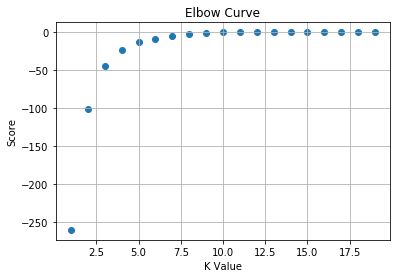

In [10]:
plt.close('all')
#plt.figure(figsize=(12,7))
plt.scatter(range(1,20), scores)
plt.grid()
plt.title('Elbow Curve')
plt.xlabel('K Value')
plt.ylabel('Score')
plt.show()

In [11]:
kmeanModel = KMeans(n_clusters=10)
kmeanModel.fit(medians[['median']])


medians['label'] = kmeanModel.labels_

In [12]:
medians['label'].value_counts()

4    21
0    16
1     9
6     6
5     6
8     3
9     1
7     1
3     1
2     1
Name: label, dtype: int64

In [16]:
test['label'].value_counts()

4    3371416
6    2380982
1    1103552
0     900355
8     747254
9     234052
3     207988
2      94894
7      74598
5      10269
Name: label, dtype: int64

In [14]:
medians['class'] = medians['index']
medians.drop('index', axis=1, inplace=True)
medians.drop('count', axis=1, inplace=True)
test = test.merge(medians, how='left', on='class')

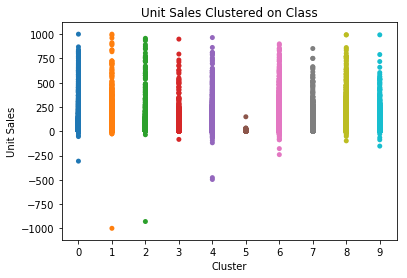

In [19]:
plt.close('all')
sns.stripplot(x='label', y='unit_sales', data=test)
plt.xlabel('Cluster')
plt.ylabel('Unit Sales')
plt.title('Unit Sales Clustered on Class')
plt.show()

In [17]:
output = medians[['class','label']]

In [18]:
output.to_csv('class_clusers.csv', index=False)

In [35]:
medians

,median,label,class
0,2.0,0,1002
1,4.0,1,1003
2,5.0,6,1004
3,2.0,0,1006
4,3.0,4,1008
5,4.0,1,1010
6,4.0,1,1012
7,6.0,8,1013
8,8.0,9,1014
9,5.0,6,1016
